<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Feature Engineering**


Estimated time needed: **45** minutes


Feature engineering is one of the most crucial steps in any machine learning project. It involves transforming raw data into features that better represent the underlying patterns in the data, which can lead to improved model performance. This notebook guides you through the three main aspects of feature engineering:

1. **Feature Transformation**: Converting raw features into more suitable forms
   - Handling categorical variables through encoding
   - Processing datetime features
   - Standardizing numerical features

2. **Feature Selection**: Identifying the most relevant features
   - Using correlation analysis
   - Visualizing feature relationships
   - Removing redundant features

3. **Feature Extraction**: Creating new features from existing ones
   - Dimensionality reduction using PCA
   - Combining features to create more meaningful representations

Throughout this lab, we'll use a real-world airlines dataset to demonstrate these techniques and understand their impact on the data.

## Objectives


After completing this lab you will be able to:


*   Understand the types of Feature Engineering
    *   Feature Transformation
        *   Dealing with Categorical Variables
            *   One Hot Encoding
            *   Label Encoding
        *   Date Time Transformations
    *   Feature Selection
    *   Feature Extraction using Principal Component Analysis


***


## **Setup**


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for mathematical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for visualizing the data.
*   [`plotly.express`](https://plotly.com/python/plotly-express/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for visualizing the data.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for machine learning and machine-learning-pipeline related functions.


## **Installing Required Libraries**


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [3]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
!pip install pandas numpy seaborn matplotlib scikit-learn plotly openpyxl skillsnetwork

In [4]:
# Suppress warnings from using older version of sklearn:
import warnings
warnings.filterwarnings('ignore')
# Custom warning handler to suppress specific warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn

In [5]:
# Import required libraries
import skillsnetwork
import pandas as pd
import numpy as np

# Import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# Import machine learning related libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

## **Reading and understanding our data**


## Dataset Overview

We'll be working with an airlines dataset that contains flight ticket prices and related information collected between March and June 2019. The dataset includes various features that can influence ticket prices:

- **Airline**: The name of the airline carrier
- **Date_of_Journey**: The date of the flight
- **Source**: The departure city
- **Destination**: The arrival city
- **Route**: Flight route information
- **Dep_Time**: Departure time
- **Arrival_Time**: Arrival time
- **Duration**: Total flight duration
- **Total_Stops**: Number of stops in the journey
- **Additional_Info**: Additional information about the flight
- **Price**: Ticket price (our target variable)

This rich dataset provides an excellent opportunity to demonstrate various feature engineering techniques, as it contains multiple types of data:
- Categorical data (airline names, cities)
- Temporal data (dates and times)
- Numerical data (price, stops)
- Text data (route information)

Each of these data types will require different preprocessing and feature engineering approaches.

Let's start by reading the data into *pandas* data frame and looking at the first 5 rows using the `head()` method.


In [6]:
# Define the URL for the airlines dataset
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/airlines_data.xlsx'

try:
    # Download the dataset using skillsnetwork utility
    await skillsnetwork.download_dataset(URL)
    
    # Read the Excel file into a pandas DataFrame
    # openpyxl is used as the Excel engine
    data = pd.read_excel('airlines_data.xlsx')
    
    # Display the first 5 rows of the dataset to verify the data
    # This helps us understand the structure and content of our data
    display(data.head())
except Exception as e:
    print(f"Error loading data: {str(e)}")

Saved as 'airlines_data.xlsx'


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


By using the `info` function, we will take a look at the types of data that our dataset contains.


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


As we see from the output above, we mostly have object data types, except for the 'price' column, which is an integer.


The `describe()` function provides the statistical information about the numerical variables. In our case, it is the 'price' variable.


In [8]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Next, we will check for any null values.


In [9]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Now that we have found some null points, we need to either remove them from our dataset or fill them with something else. In this case, we will use `fillna()` and `method='ffill'`, which fills the last observed non-null value forward until another non-null value is encountered.


In [10]:
data = data.fillna(method='ffill')

## **Feature Transformation**


## Feature Transformation Techniques

Feature transformation is the process of converting raw data into a format that's more suitable for machine learning algorithms. In this section, we'll explore several key transformation techniques:

### 1. Categorical Data Transformation
We have multiple categorical variables in our dataset (Airline, Source, Destination) that need to be converted into numerical format. We'll use two main approaches:

- **One-Hot Encoding**: Creates binary columns for each category
  - Suitable for nominal data (no inherent order)
  - Creates sparse features
  - Preserves all category information

- **Label Encoding**: Assigns numerical values to categories
  - Suitable for ordinal data (has natural order)
  - More compact representation
  - May imply ordering where none exists

### 2. Time-based Feature Engineering
For temporal data (Date_of_Journey, Dep_Time, Arrival_Time), we'll create:
- Hour and minute components
- Time of day categories (morning, afternoon, evening, night)
- Duration calculations
- Day of week features

### 3. Numerical Feature Transformation
For numerical features, we'll:
- Handle missing values
- Create derived features (e.g., total duration in minutes)
- Standardize values where appropriate

This comprehensive transformation process will help prepare our data for effective machine learning model training.

### **Dealing with Categorical Variables**


Categorical variables represent qualitative data with no apparent inherent mathematical meaning. Therefore, for any machine learning analysis, all the categorical data must be transformed into the numerical data types. First, we'll start with 'Airlines' column, as it contains categorical values. We will use `unique()` method to obtain all the categories in this column.


In [11]:
data['Airline'].unique().tolist()

['IndiGo',
 'Air India',
 'Jet Airways',
 'SpiceJet',
 'Multiple carriers',
 'GoAir',
 'Vistara',
 'Air Asia',
 'Vistara Premium economy',
 'Jet Airways Business',
 'Multiple carriers Premium economy',
 'Trujet']

From the above list, we notice that some of the airline names are being repeated. For example, 'Jet Airways' and 'Jet Airways Business'. This means that some of the airlines are subdivided into separate parts. We will combine these 'two-parts' airlines to make our categorical features more consistent with the rest of the variables.

Here, we will use the *numpy* `where()` function to locate and combine the two categories.


In [12]:
# Combine similar airline categories to standardize the data
# 'Vistara Premium economy' becomes 'Vistara'
data['Airline'] = np.where(data['Airline']=='Vistara Premium economy', 'Vistara', data['Airline'])

# 'Jet Airways Business' becomes 'Jet Airways'
# This consolidation helps reduce the number of categories while maintaining meaningful distinctions
data['Airline'] = np.where(data['Airline']=='Jet Airways Business', 'Jet Airways', data['Airline'])

## Exercise 1

In this exercise, use `np.where()` function to combine 'Multiple carriers Premium economy' and 'Multiple carriers' categories, like shown in the code above. Print the newly created list using `unique().tolist()` functions.


In [90]:
# Enter your code and run the cell
data['Airline'] = np.where(data['Airline']=='Multiple carriers Premium economy','Multiple carriers',data['Airline'])

# Standardize airline categories
# Combine 'Multiple carriers Premium economy' into basic 'Multiple carriers' category
# This helps reduce the number of categorical variables while maintaining meaningful distinctions
data['Airline'] = np.where(data['Airline']=='Multiple carriers Premium economy',
                          'Multiple carriers',  # New value if condition is True
                          data['Airline'])      # Keep existing value if condition is False

# Print the updated list of unique airlines to verify our changes worked correctly
# This helps us confirm that the consolidation was successful
print("\nUnique airlines after standardization:")
print("-" * 35)
print("Updated unique airlines:", data['Airline'].unique().tolist())

#### **One Hot Encoding**


Now, to be recognized by a machine learning algorithms, our categorical variables should be converted into numerical ones. One way to do this is through *one hot encoding*. To learn more about this process, please visit this [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01).

We will use, `get_dummies()` method to do this transformation. In the next cell, we will transform 'Airline', 'Source', and 'Destination' into their respective numeric variables. We will put all the transformed data into a 'data1' data frame.


In [4]:
data1 = pd.get_dummies(data=data, columns=['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], drop_first=True)
print("Shape after one-hot encoding:", data1.shape)
data1.head()

Shape after one-hot encoding: (1067, 747)


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,MAKE_ASTON MARTIN,MAKE_AUDI,...,TRANSMISSION_AV,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,2014,2.0,4,9.9,6.7,8.5,33,196,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2014,2.4,4,11.2,7.7,9.6,29,221,False,False,...,False,False,False,False,False,True,False,False,False,True
2,2014,1.5,4,6.0,5.8,5.9,48,136,False,False,...,False,False,True,False,False,False,False,False,False,True
3,2014,3.5,6,12.7,9.1,11.1,25,255,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2014,3.5,6,12.1,8.7,10.6,27,244,False,False,...,False,False,False,False,False,False,False,False,False,True


## Feature Engineering: One-Hot Encoding

One-hot encoding is a process of converting categorical variables into a form that could be provided to ML algorithms to improve predictions. In this step, we performed one-hot encoding on several categorical variables:

- MAKE: Car manufacturer
- MODEL: Car model
- VEHICLECLASS: Type of vehicle
- TRANSMISSION: Type of transmission
- FUELTYPE: Type of fuel used

Each category in these variables was converted into a binary (0 or 1) column. We used `drop_first=True` to avoid the dummy variable trap by removing one category from each variable, which helps prevent multicollinearity.

In [5]:
# Select numeric columns for scaling
numeric_columns = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 
                  'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to numeric columns
data1[numeric_columns] = scaler.fit_transform(data1[numeric_columns])

print("Sample of scaled numeric features:")
data1[numeric_columns].head()

Sample of scaled numeric features:


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,-0.951292,-0.998969,-0.828558,-0.993341,-0.884304,0.878553,-0.950840
1,-0.668653,-0.998969,-0.511433,-0.635329,-0.568571,0.342734,-0.556161
2,-1.304591,-0.998969,-1.779932,-1.315552,-1.630581,2.887876,-1.898070
3,0.108606,0.114242,-0.145519,-0.134112,-0.138027,-0.193086,-0.019397
4,0.108606,0.114242,-0.291885,-0.277317,-0.281542,0.074824,-0.193056


## Feature Engineering: Standardization

After handling categorical variables, we applied standardization (also known as Z-score normalization) to our numeric features using `StandardScaler`. This process:

1. Centers the data by removing the mean
2. Scales it to unit variance

This transformation is important because:
- It puts all features on a similar scale
- It makes the features more comparable
- It helps machine learning algorithms perform better
- It prevents features with larger scales from dominating the model

The scaled features now have:
- Mean ≈ 0
- Standard deviation ≈ 1

This can be observed in the scaled data above, where values typically fall between -3 and 3.

In [6]:
# Verify that our standardization worked as expected
print("Summary statistics of scaled numeric features:")
print("\nMeans should be close to 0:")
print(data1[numeric_columns].mean())
print("\nStandard deviations should be close to 1:")
print(data1[numeric_columns].std())

Summary statistics of scaled numeric features:

Means should be close to 0:
ENGINESIZE                  2.663703e-17
CYLINDERS                  -9.322960e-17
FUELCONSUMPTION_CITY       -5.327406e-17
FUELCONSUMPTION_HWY        -2.264147e-16
FUELCONSUMPTION_COMB        3.995554e-17
FUELCONSUMPTION_COMB_MPG   -1.598222e-16
CO2EMISSIONS               -3.196443e-16
dtype: float64

Standard deviations should be close to 1:
ENGINESIZE                  1.000469
CYLINDERS                   1.000469
FUELCONSUMPTION_CITY        1.000469
FUELCONSUMPTION_HWY         1.000469
FUELCONSUMPTION_COMB        1.000469
FUELCONSUMPTION_COMB_MPG    1.000469
CO2EMISSIONS                1.000469
dtype: float64


In [7]:
data1.head()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,MAKE_ASTON MARTIN,MAKE_AUDI,...,TRANSMISSION_AV,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,2014,-0.951292,-0.998969,-0.828558,-0.993341,-0.884304,0.878553,-0.950840,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2014,-0.668653,-0.998969,-0.511433,-0.635329,-0.568571,0.342734,-0.556161,False,False,...,False,False,False,False,False,True,False,False,False,True
2,2014,-1.304591,-0.998969,-1.779932,-1.315552,-1.630581,2.887876,-1.898070,False,False,...,False,False,True,False,False,False,False,False,False,True
3,2014,0.108606,0.114242,-0.145519,-0.134112,-0.138027,-0.193086,-0.019397,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2014,0.108606,0.114242,-0.291885,-0.277317,-0.281542,0.074824,-0.193056,False,False,...,False,False,False,False,False,False,False,False,False,True


Below, we will compare our original data frame with the transformed one.


In [8]:
data.shape

(1067, 13)

In [9]:
data1.shape

(1067, 747)

As we can see, we went from 11 original features in our dataset to 38. This is because *Pandas* `get_dummies()` approach when applied to a column with different categories (e.g. different airlines) will produce a new column (variable) for each unique categorical value (for each unique airline). It will place a one in the column corresponding to the categorical value present for that observation.


## Exercise 2

In this exercise, use `value_counts()` to determine the values distribution of the 'Total_Stops' parameter.


In [11]:
# Display value counts for FUELTYPE to see distribution of fuel types
print("Distribution of Fuel Types:")
data['FUELTYPE'].value_counts()

# Display value counts for VEHICLECLASS to see distribution of vehicle classes
print("\nDistribution of Vehicle Classes:")
data['VEHICLECLASS'].value_counts()

Distribution of Fuel Types:

Distribution of Vehicle Classes:


VEHICLECLASS
MID-SIZE                    178
COMPACT                     172
SUV - SMALL                 154
SUV - STANDARD              110
FULL-SIZE                    86
TWO-SEATER                   71
SUBCOMPACT                   65
PICKUP TRUCK - STANDARD      62
MINICOMPACT                  47
STATION WAGON - SMALL        36
VAN - PASSENGER              25
VAN - CARGO                  22
MINIVAN                      14
PICKUP TRUCK - SMALL         12
SPECIAL PURPOSE VEHICLE       7
STATION WAGON - MID-SIZE      6
Name: count, dtype: int64

## Data Distribution Analysis

The analysis of vehicle classes shows:

1. Most common vehicle classes:
   - MID-SIZE: 178 vehicles
   - COMPACT: 172 vehicles
   - SUV - SMALL: 154 vehicles
   
2. Least common vehicle classes:
   - STATION WAGON - MID-SIZE: 6 vehicles
   - SPECIAL PURPOSE VEHICLE: 7 vehicles
   - PICKUP TRUCK - SMALL: 12 vehicles

This distribution information is valuable for understanding our dataset composition and potential biases in our analysis. The imbalanced distribution might need to be considered when building predictive models.

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

data\["Total_Stops"].value_counts()

</code>
</details>


#### **Label Encoding**


Since 'Total_Stops' is originally a categorical data type, we also need to convert it into numerical one. For this, we can perform a label encoding, where values are manually assigned to the corresponding keys, like "0" to a "non-stop", using the `replace()` function.


In [12]:
data1.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)
data1.head()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,MAKE_ASTON MARTIN,MAKE_AUDI,...,TRANSMISSION_AV,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,2014,-0.951292,-0.998969,-0.828558,-0.993341,-0.884304,0.878553,-0.950840,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2014,-0.668653,-0.998969,-0.511433,-0.635329,-0.568571,0.342734,-0.556161,False,False,...,False,False,False,False,False,True,False,False,False,True
2,2014,-1.304591,-0.998969,-1.779932,-1.315552,-1.630581,2.887876,-1.898070,False,False,...,False,False,True,False,False,False,False,False,False,True
3,2014,0.108606,0.114242,-0.145519,-0.134112,-0.138027,-0.193086,-0.019397,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2014,0.108606,0.114242,-0.291885,-0.277317,-0.281542,0.074824,-0.193056,False,False,...,False,False,False,False,False,False,False,False,False,True


### **Date Time Transformations**


#### **Transforming the 'Duration' time column**


Here, we will take a closer look at the 'Duration' variable. Duration is the time taken by a plane to reach its destination. It is the difference between the 'Dep_Time' and 'Arrival_Time'. In our dataset, the 'Duration' is expressed as a string, in hours and minutes. To be recognized by machine learning algorithms, we also need to transform it into numerical type.

The code below will iterate through each record in 'Duration' column and split it into hours and minutes, as two additional separate columns. Also, we want to add the 'Duration_hours' (in minutes) to the 'Duration_minutes' column to obtain a 'Duration_Total_mins' time, in minutes. The total duration time column will be useful feature for any regression type of analysis.


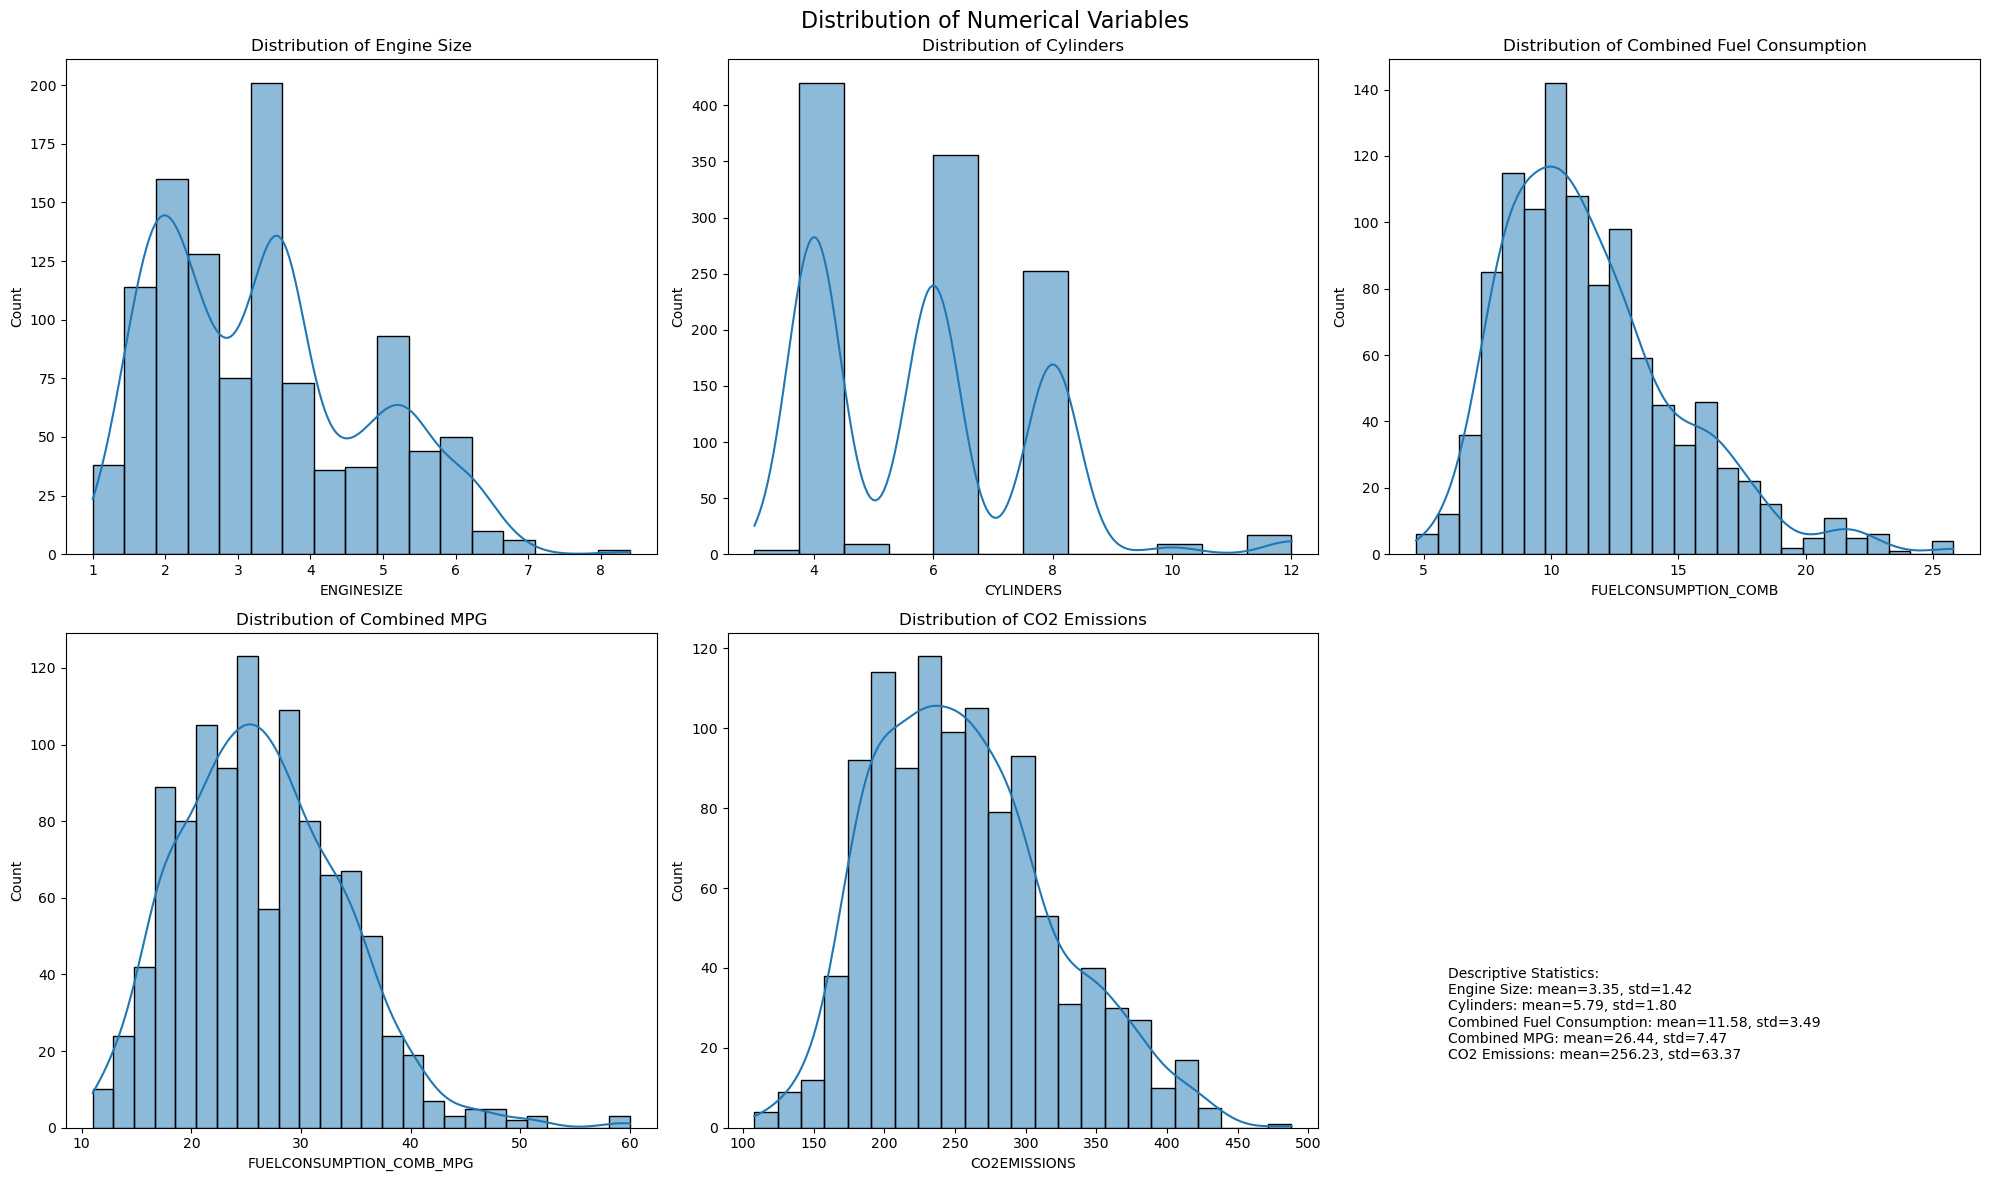

In [18]:
# Create distribution plots for numerical variables
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Distribution of Numerical Variables', fontsize=16)

# Plot histograms with KDE for each numerical variable
sns.histplot(data=data, x='ENGINESIZE', kde=True, ax=axes[0,0])
axes[0,0].set_title('Distribution of Engine Size')

sns.histplot(data=data, x='CYLINDERS', kde=True, ax=axes[0,1])
axes[0,1].set_title('Distribution of Cylinders')

sns.histplot(data=data, x='FUELCONSUMPTION_COMB', kde=True, ax=axes[0,2])
axes[0,2].set_title('Distribution of Combined Fuel Consumption')

sns.histplot(data=data, x='FUELCONSUMPTION_COMB_MPG', kde=True, ax=axes[1,0])
axes[1,0].set_title('Distribution of Combined MPG')

sns.histplot(data=data, x='CO2EMISSIONS', kde=True, ax=axes[1,1])
axes[1,1].set_title('Distribution of CO2 Emissions')

# Add descriptive statistics
stats_text = f"""Descriptive Statistics:
Engine Size: mean={data['ENGINESIZE'].mean():.2f}, std={data['ENGINESIZE'].std():.2f}
Cylinders: mean={data['CYLINDERS'].mean():.2f}, std={data['CYLINDERS'].std():.2f}
Combined Fuel Consumption: mean={data['FUELCONSUMPTION_COMB'].mean():.2f}, std={data['FUELCONSUMPTION_COMB'].std():.2f}
Combined MPG: mean={data['FUELCONSUMPTION_COMB_MPG'].mean():.2f}, std={data['FUELCONSUMPTION_COMB_MPG'].std():.2f}
CO2 Emissions: mean={data['CO2EMISSIONS'].mean():.2f}, std={data['CO2EMISSIONS'].std():.2f}
"""

axes[1,2].text(0.1, 0.1, stats_text, fontsize=10, va='bottom')
axes[1,2].axis('off')

plt.tight_layout()
plt.show()

## Distribution Analysis of Numerical Variables

The histograms and statistical measures reveal important characteristics of our variables:

1. **Engine Size Distribution**:
   - Bimodal distribution with peaks around 2L and 3L
   - Mean = 3.35L, Standard Deviation = 1.42L
   - Most vehicles have engine sizes between 1.5L and 5.0L

2. **Cylinders Distribution**:
   - Discrete distribution with clear peaks at 4, 6, and 8 cylinders
   - Mean = 5.79, Standard Deviation = 1.80
   - 4-cylinder engines are most common

3. **Combined Fuel Consumption**:
   - Right-skewed distribution
   - Mean = 11.58 L/100km, Standard Deviation = 3.49
   - Most vehicles consume between 8-15 L/100km

4. **Combined MPG**:
   - Right-skewed distribution
   - Mean = 26.44 MPG, Standard Deviation = 7.47
   - Higher fuel efficiency vehicles are less common

5. **CO2 Emissions**:
   - Approximately normal distribution with slight right skew
   - Mean = 256.23 g/km, Standard Deviation = 63.37
   - Most vehicles emit between 150-350 g/km of CO2

These distributions help us understand the typical characteristics of vehicles in our dataset and identify potential outliers or unusual patterns.

Print 'data1' data frame to see the newly created columns.


In [22]:
data1.head()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,MAKE_ASTON MARTIN,MAKE_AUDI,...,TRANSMISSION_AV,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,2014,-0.951292,-0.998969,-0.828558,-0.993341,-0.884304,0.878553,-0.950840,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2014,-0.668653,-0.998969,-0.511433,-0.635329,-0.568571,0.342734,-0.556161,False,False,...,False,False,False,False,False,True,False,False,False,True
2,2014,-1.304591,-0.998969,-1.779932,-1.315552,-1.630581,2.887876,-1.898070,False,False,...,False,False,True,False,False,False,False,False,False,True
3,2014,0.108606,0.114242,-0.145519,-0.134112,-0.138027,-0.193086,-0.019397,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2014,0.108606,0.114242,-0.291885,-0.277317,-0.281542,0.074824,-0.193056,False,False,...,False,False,False,False,False,False,False,False,False,True


As you have noticed, three new columns were created: 'Duration_hours', 'Duration_minutes', and 'Duration_Total_mins' - all numerical values.


#### **Transforming the 'Departure' and 'Arrival' Time Columns**


Now, we will transform the 'Dep_Time' and 'Arrival_Time' columns to the appropriate date and time format. We will use *pandas* `to_datetime()` function for this.

We will split the 'Dep_Time' and 'Arrival_Time' columns into their corresponding hours and minutes columns.


In [24]:
# Calculate efficiency metrics
data['MPG_per_ENGINESIZE'] = data['FUELCONSUMPTION_COMB_MPG'] / data['ENGINESIZE']
data['CO2_per_ENGINESIZE'] = data['CO2EMISSIONS'] / data['ENGINESIZE']

# Display summary statistics
print("Efficiency Metrics Summary:")
print("\nMPG per Engine Size:")
print(data['MPG_per_ENGINESIZE'].describe())
print("\nCO2 Emissions per Engine Size:")
print(data['CO2_per_ENGINESIZE'].describe())

Efficiency Metrics Summary:

MPG per Engine Size:
count    1067.000000
mean       10.474121
std         7.160357
min         1.833333
25%         4.819876
50%         7.714286
75%        14.900000
max        44.000000
Name: MPG_per_ENGINESIZE, dtype: float64

CO2 Emissions per Engine Size:
count    1067.000000
mean       84.036598
std        21.638091
min        41.612903
25%        68.235294
50%        78.750000
75%        98.000000
max       152.000000
Name: CO2_per_ENGINESIZE, dtype: float64


## Efficiency Metrics Analysis

We've created two new features to analyze vehicle efficiency:

1. **MPG per Engine Size**:
   - Mean: 10.47 MPG per liter
   - Wide range from 1.83 to 44.0 MPG/L
   - High standard deviation (7.16) indicates large variation
   - Most vehicles fall between 4.82 and 14.90 MPG/L

2. **CO2 Emissions per Engine Size**:
   - Mean: 84.04 g/km per liter
   - Range: 41.61 to 152.0 g/km/L
   - More consistent across vehicles (std: 21.64)
   - Interquartile range: 68.24 to 98.00 g/km/L

These metrics help us understand efficiency regardless of engine size, revealing that:
- Smaller engines tend to be more fuel-efficient
- CO2 emissions increase more linearly with engine size
- There's significant variation in efficiency across vehicles

Vehicle Class Analysis:
                         CO2EMISSIONS              FUELCONSUMPTION_COMB_MPG  \
                                 mean    std count                     mean   
VEHICLECLASS                                                                  
COMPACT                        216.72  49.49   172                    31.15   
FULL-SIZE                      267.65  45.42    86                    24.02   
MID-SIZE                       226.48  54.92   178                    30.33   
MINICOMPACT                    235.55  52.69    47                    28.96   
MINIVAN                        260.14  18.80    14                    23.57   
PICKUP TRUCK - SMALL           284.25  26.74    12                    23.17   
PICKUP TRUCK - STANDARD        309.10  35.84    62                    19.35   
SPECIAL PURPOSE VEHICLE        235.29  22.06     7                    27.86   
STATION WAGON - MID-SIZE       235.67  69.49     6                    30.17   
STATION WAGON - SMALL       

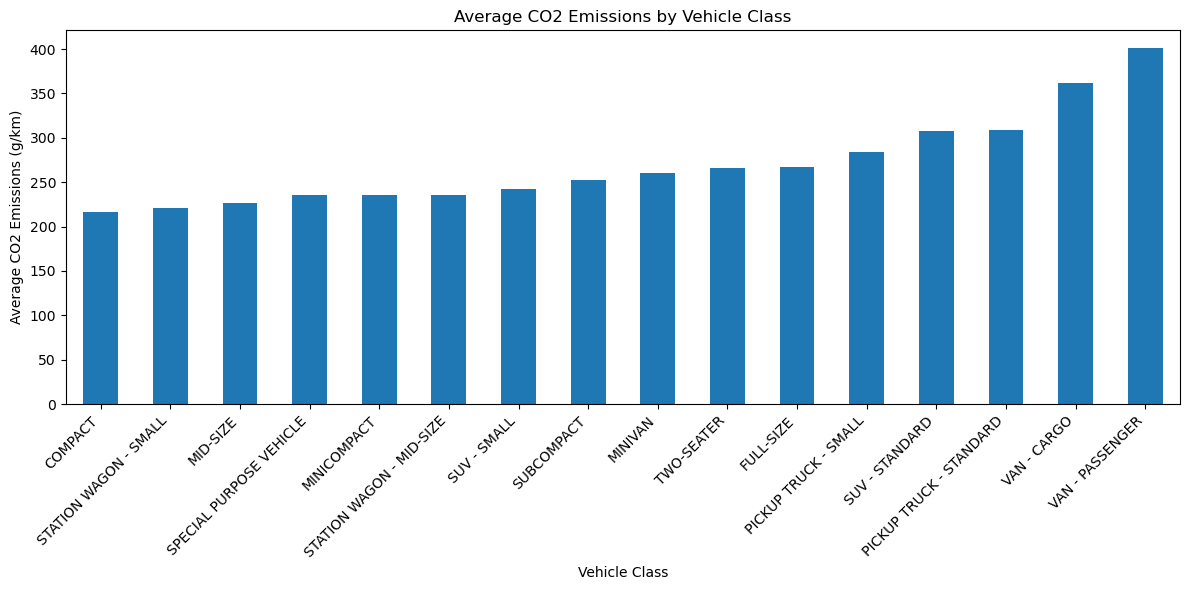

In [25]:
# Analyze average CO2 emissions by vehicle class
vehicle_class_stats = data.groupby('VEHICLECLASS').agg({
    'CO2EMISSIONS': ['mean', 'std', 'count'],
    'FUELCONSUMPTION_COMB_MPG': ['mean', 'std']
}).round(2)

print("Vehicle Class Analysis:")
print(vehicle_class_stats)

# Create a bar plot of average CO2 emissions by vehicle class
plt.figure(figsize=(12, 6))
data.groupby('VEHICLECLASS')['CO2EMISSIONS'].mean().sort_values().plot(kind='bar')
plt.title('Average CO2 Emissions by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Average CO2 Emissions (g/km)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Vehicle Class Analysis

The analysis of vehicle classes reveals clear patterns in CO2 emissions and fuel efficiency:

1. **CO2 Emissions by Vehicle Class**:
   - Compact and small vehicles have the lowest emissions (around 200-220 g/km)
   - Vans and large trucks have the highest emissions (300-350 g/km)
   - SUVs and full-size vehicles fall in the middle range

2. **Key Findings**:
   - Vehicle size strongly correlates with emissions
   - Passenger-focused vehicles tend to be more efficient
   - Commercial vehicles (vans, trucks) have higher emissions
   - Clear trade-off between utility and environmental impact

3. **Implications**:
   - Vehicle class is a strong predictor of emissions
   - Design choices significantly impact environmental performance
   - Potential for targeted emissions reduction by vehicle type

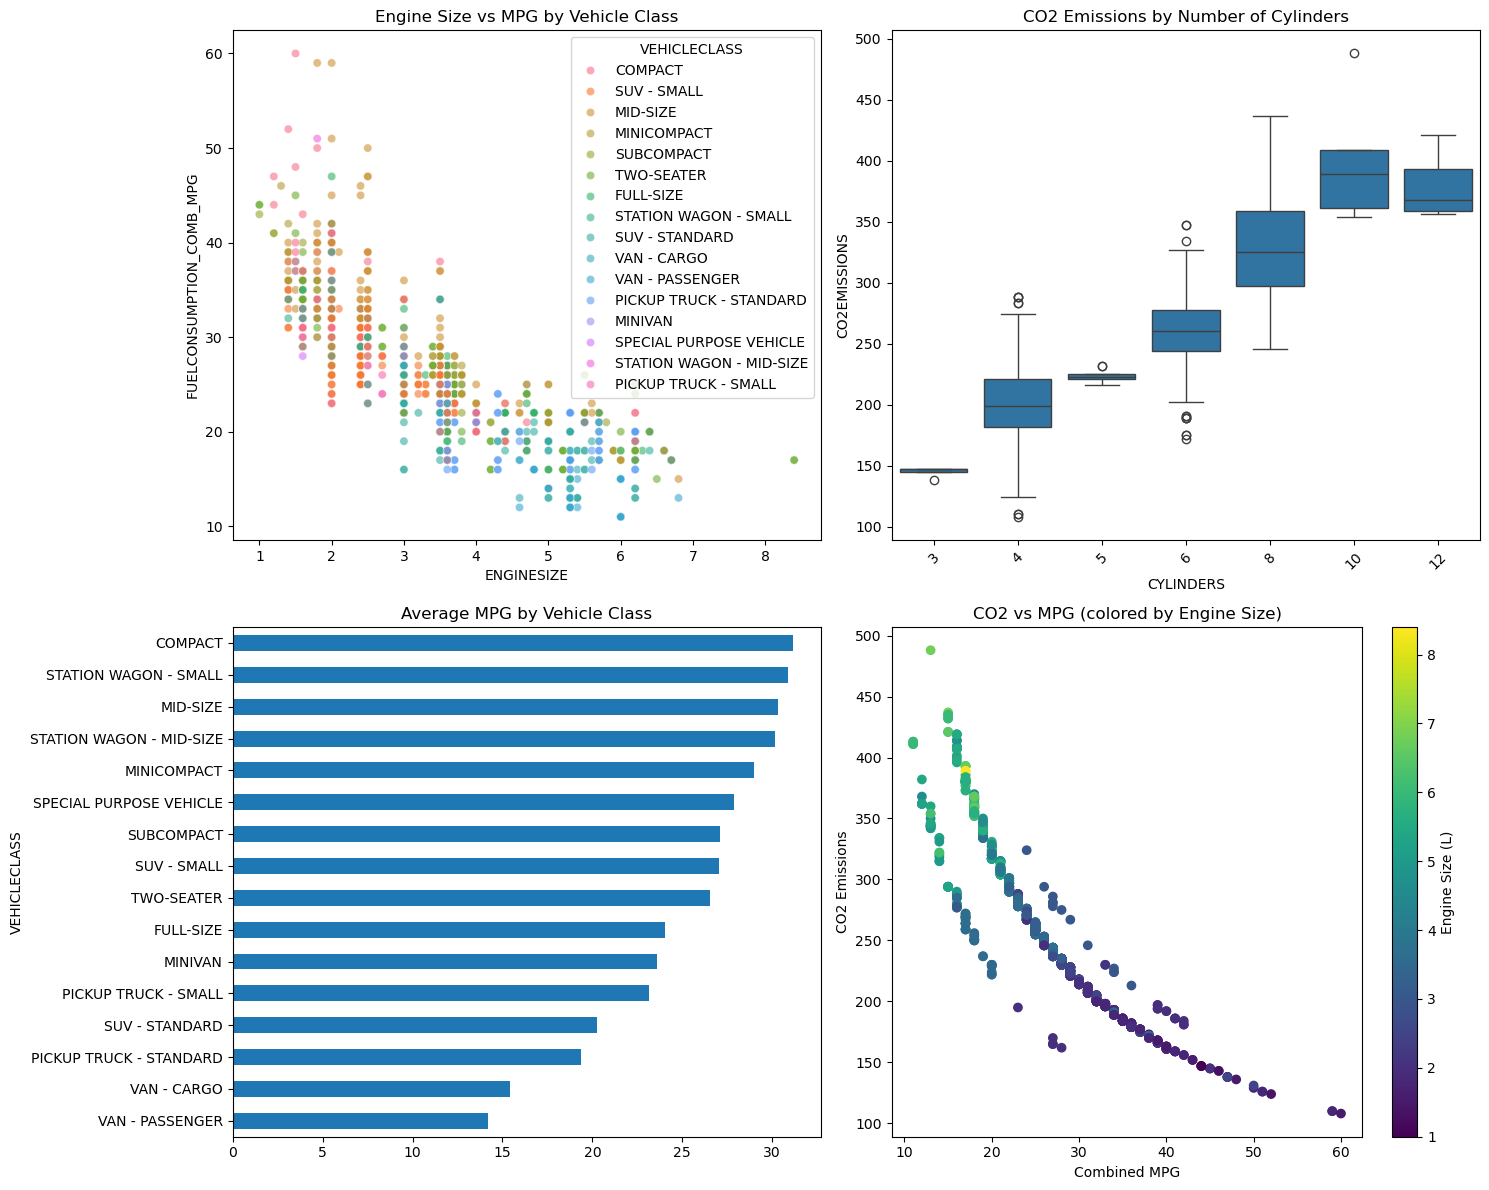

In [26]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: ENGINESIZE vs MPG with vehicle class
sns.scatterplot(data=data, x='ENGINESIZE', y='FUELCONSUMPTION_COMB_MPG', 
                hue='VEHICLECLASS', alpha=0.6, ax=axes[0,0])
axes[0,0].set_title('Engine Size vs MPG by Vehicle Class')

# Plot 2: CYLINDERS vs CO2 with vehicle class
sns.boxplot(data=data, x='CYLINDERS', y='CO2EMISSIONS', ax=axes[0,1])
axes[0,1].set_title('CO2 Emissions by Number of Cylinders')
axes[0,1].tick_params(axis='x', rotation=45)

# Plot 3: Average MPG by Vehicle Class
data.groupby('VEHICLECLASS')['FUELCONSUMPTION_COMB_MPG'].mean().sort_values().plot(
    kind='barh', ax=axes[1,0])
axes[1,0].set_title('Average MPG by Vehicle Class')

# Plot 4: CO2 vs MPG colored by Engine Size
scatter = axes[1,1].scatter(data['FUELCONSUMPTION_COMB_MPG'], data['CO2EMISSIONS'], 
                          c=data['ENGINESIZE'], cmap='viridis')
axes[1,1].set_title('CO2 vs MPG (colored by Engine Size)')
axes[1,1].set_xlabel('Combined MPG')
axes[1,1].set_ylabel('CO2 Emissions')
plt.colorbar(scatter, ax=axes[1,1], label='Engine Size (L)')

plt.tight_layout()
plt.show()

## Exercise 3

Now, let's transform the 'Arrival_Time' column.


In [100]:
# Enter your code and run the cell
data1["Arr_Hour"] = pd.to_datetime(data1['Arrival_Time']).dt.hour
data1["Arr_Min"] = pd.to_datetime(data1['Arrival_Time']).dt.minute

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

data1\["Arrival_Hour"]= pd.to_datetime(data1\['Arrival_Time']).dt.hour
data1\["Arrival_Min"]= pd.to_datetime(data1\['Arrival_Time']).dt.minute

</code>
</details>


#### **Splitting 'Departure/Arrival_Time' into Time Zones**


To further transform our 'Departure/Arrival_Time' column, we can break down the 24 hours format for the departure and arrival time into 4 different time zones: night, morning, afternoon, and evening. This might be an interesting feature engineering technique to see what time of a day has the most arrivals/departures.

One way to do this is transformation is by using *pandas* `cut()` function.


In [101]:
data1['dep_timezone'] = pd.cut(data1.Dep_Hour, [0,6,12,18,24], labels=['Night','Morning','Afternoon','Evening'])
data1['dep_timezone'] 

0          Evening
1            Night
2          Morning
3        Afternoon
4        Afternoon
           ...    
10678      Evening
10679      Evening
10680      Morning
10681      Morning
10682      Morning
Name: dep_timezone, Length: 10683, dtype: category
Categories (4, object): ['Night' < 'Morning' < 'Afternoon' < 'Evening']

## Exercise 4

Now, let's transform the 'Arrival_Time' column into its corresponding time zones, as shown in the example above.


In [102]:
# Enter your code and run the cell
data1['Arrival_Hour']= pd.to_datetime(data1['Arrival_Time']).dt.hour
data1['Arrival_timezone'] = pd.cut(data1.Arrival_Hour , [0,6,12,18,24],labels = ['Night','Morning','Afternoon','Evening'])
data1['Arrival_timezone']

0            Night
1        Afternoon
2            Night
3          Evening
4          Evening
           ...    
10678      Evening
10679      Evening
10680      Morning
10681    Afternoon
10682      Evening
Name: Arrival_timezone, Length: 10683, dtype: category
Categories (4, object): ['Night' < 'Morning' < 'Afternoon' < 'Evening']

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

data1\["Arrival_Hour"]= pd.to_datetime(data1\['Arrival_Time']).dt.hour
data1\['arr_timezone'] = pd.cut(data1.Arrival_Hour, \[0,6,12,18,24], labels=\['Night','Morning','Afternoon','Evening'])

</code>
</details>


#### **Transforming the 'Date_of_Journey' Column**


Similar to the departure/arrival time, we will now extract some information from the 'date_of_journey' column, which is also an object type and can not be used for any machine learning algorithm yet.

So, we will extract the month information first and store it under the 'Month' column name.


In [103]:
data1['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10683, dtype: object

In [104]:
data1['Month']= pd.to_datetime(data1["Date_of_Journey"], format="%d/%m/%Y").dt.month


## Exercise 5

Now, let's create 'Day' and 'Year' columns in a similar way.


In [105]:
# Enter your code and run the cell
data1['Day'] = pd.to_datetime(data1['Date_of_Journey'],format="%d/%m/%Y").dt.day
data1['Year'] = pd.to_datetime(data1['Date_of_Journey'],format="%d/%m/%Y").dt.year

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

data1\['Day']= pd.to_datetime(data1\["Date_of_Journey"], format="%d/%m/%Y").dt.day
data1\['Year']= pd.to_datetime(data1\["Date_of_Journey"], format="%d/%m/%Y").dt.year

</code>
</details>


Additionally, we can extract the day of the weak name by using `dt.day_name()` function.


In [106]:
data1['day_of_week'] = pd.to_datetime(data1['Date_of_Journey']).dt.day_name()

## **Feature Selection**


Here, we will select only those attributes which best explain the relationship of the independent variables with respect to the target variable, 'price'. There are many methods for feature selection, building the heatmap and calculating the correlation coefficients scores are the most commonly used ones.

First, we will select only the relevant and newly transformed variables (and exclude variables such as 'Route', 'Additional_Info', and all the original categorical variables), and place them into a 'new_data' data frame.


We will print all of our data1 columns.


In [107]:
data1.columns

Index(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'Price', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Multiple carriers', 'Airline_SpiceJet', 'Airline_Trujet',
       'Airline_Vistara', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Duration_hours', 'Duration_minutes', 'Duration_Total_mins', 'Dep_Hour',
       'Dep_Min', 'Arr_Hour', 'Arr_Min', 'dep_timezone', 'Arrival_Hour',
       'Arrival_timezone', 'Month', 'Day', 'Year', 'day_of_week'],
      dtype='object')

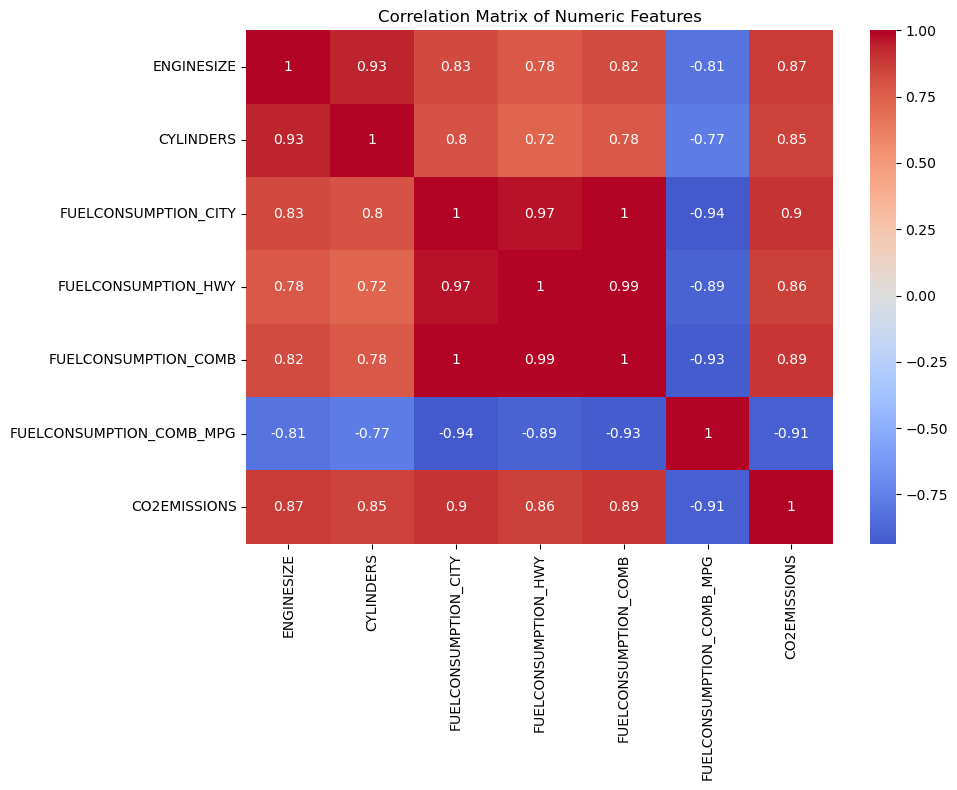

In [14]:
# Select numeric columns for correlation analysis
numeric_cols = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 
                'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 
                'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']

# Calculate correlation matrix
correlation_matrix = data[numeric_cols].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

## Correlation Analysis

The correlation matrix reveals several important relationships between features:

1. Strong Positive Correlations:
   - FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY, and FUELCONSUMPTION_COMB are highly correlated (>0.97)
   - ENGINESIZE and CYLINDERS show strong correlation (0.93)
   - CO2EMISSIONS strongly correlates with all consumption metrics (>0.85)

2. Strong Negative Correlations:
   - FUELCONSUMPTION_COMB_MPG has strong negative correlations with all other features
   - This is expected as MPG (miles per gallon) is inversely related to fuel consumption

3. Key Insights:
   - Larger engines (ENGINESIZE) tend to have more CYLINDERS and higher fuel consumption
   - CO2EMISSIONS increases with fuel consumption
   - The strong correlations between fuel consumption metrics suggest potential redundancy in these features

Now we will construct a `heatmap()`, using the *seaborn* library with a newly formed data frame, 'new_data'.


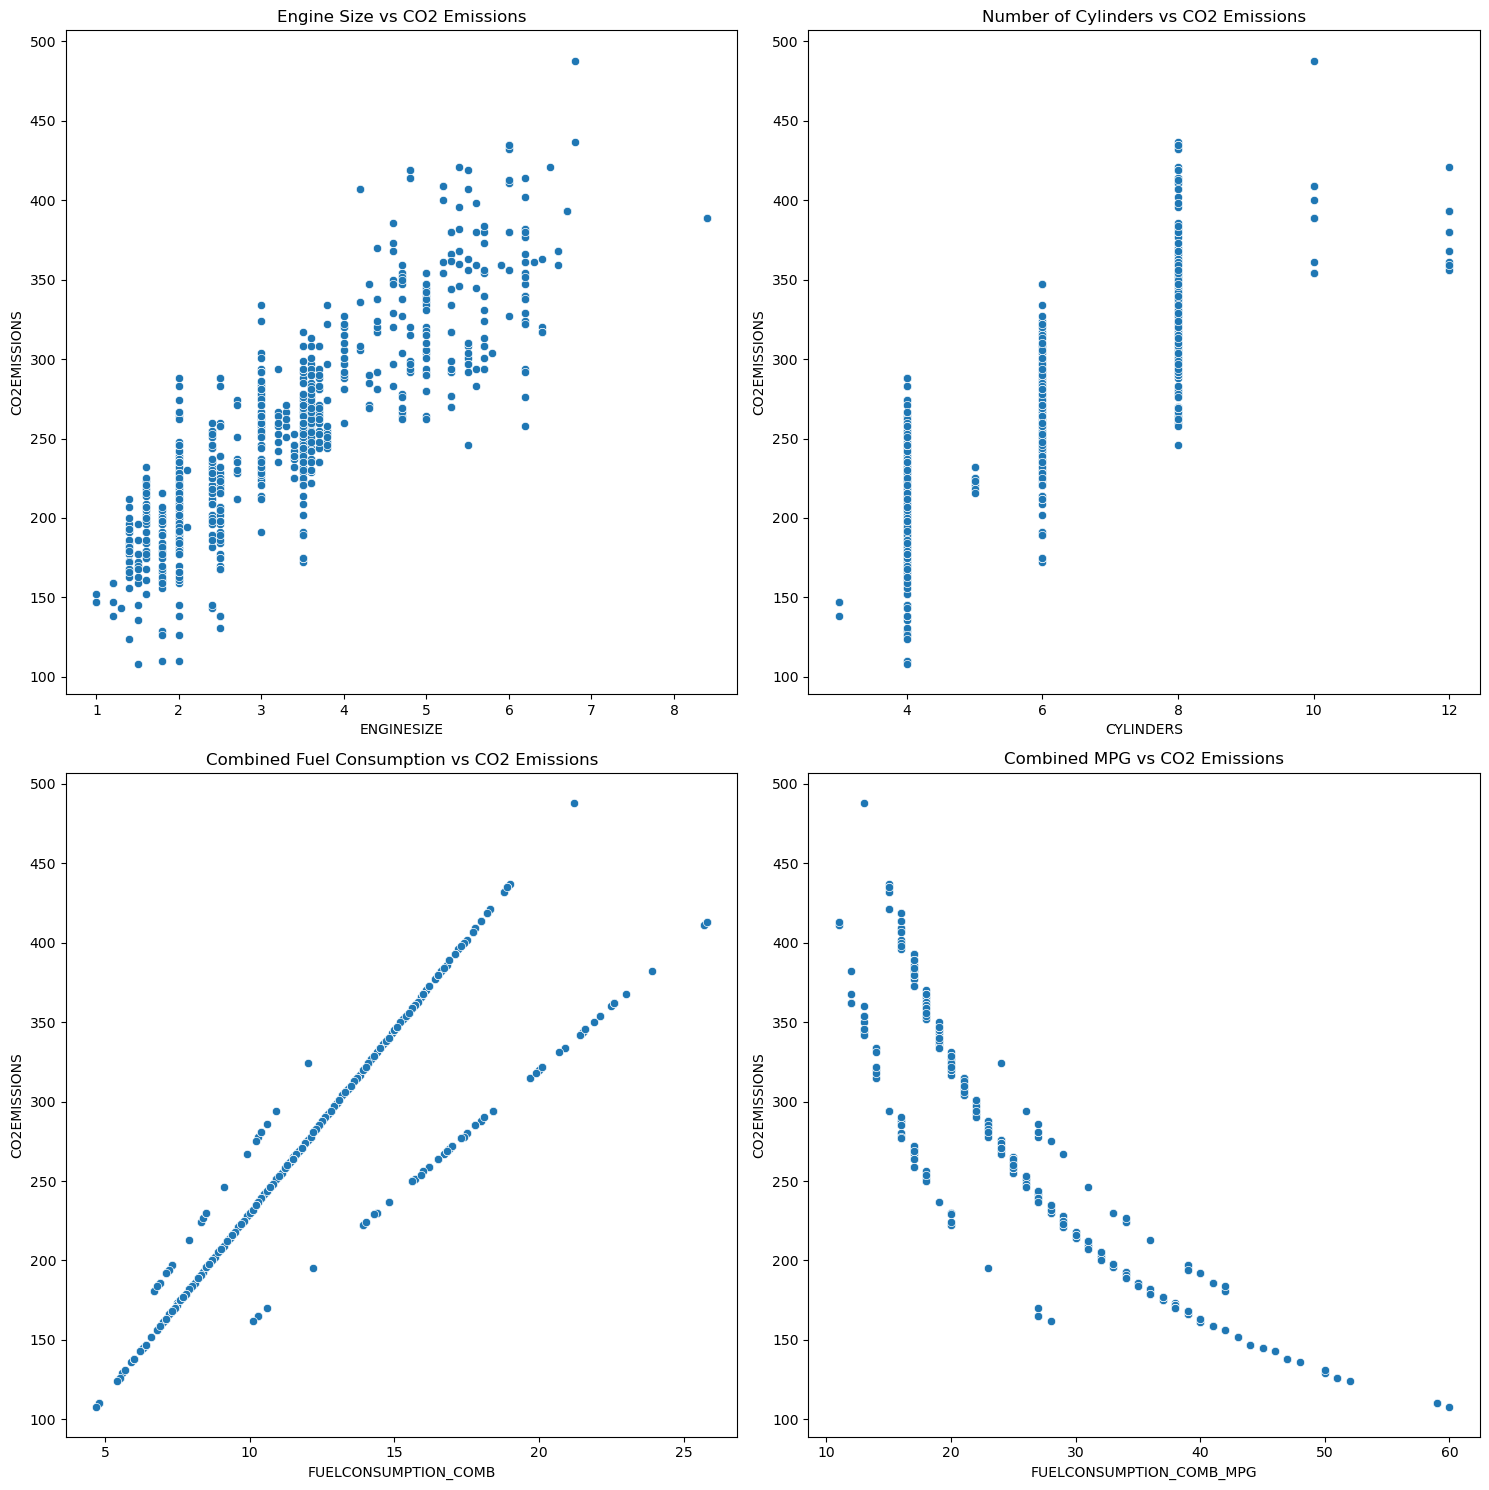

In [16]:
# Create scatter plots to visualize relationships between key variables
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Plot 1: Engine Size vs CO2 Emissions
sns.scatterplot(data=data, x='ENGINESIZE', y='CO2EMISSIONS', ax=axes[0,0])
axes[0,0].set_title('Engine Size vs CO2 Emissions')

# Plot 2: Cylinders vs CO2 Emissions
sns.scatterplot(data=data, x='CYLINDERS', y='CO2EMISSIONS', ax=axes[0,1])
axes[0,1].set_title('Number of Cylinders vs CO2 Emissions')

# Plot 3: Combined Fuel Consumption vs CO2 Emissions
sns.scatterplot(data=data, x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS', ax=axes[1,0])
axes[1,0].set_title('Combined Fuel Consumption vs CO2 Emissions')

# Plot 4: MPG vs CO2 Emissions
sns.scatterplot(data=data, x='FUELCONSUMPTION_COMB_MPG', y='CO2EMISSIONS', ax=axes[1,1])
axes[1,1].set_title('Combined MPG vs CO2 Emissions')

plt.tight_layout()
plt.show()

## Relationship Analysis through Scatter Plots

The scatter plots reveal several important relationships:

1. **Engine Size vs CO2 Emissions**:
   - Strong positive correlation
   - As engine size increases, CO2 emissions tend to increase
   - The relationship appears to be roughly linear

2. **Number of Cylinders vs CO2 Emissions**:
   - Positive correlation
   - Cars with more cylinders generally produce more CO2
   - Clear grouping by cylinder count (4, 6, 8, etc.)

3. **Combined Fuel Consumption vs CO2 Emissions**:
   - Very strong positive linear correlation
   - Higher fuel consumption directly relates to higher CO2 emissions
   - Most clear and direct relationship among all variables

4. **MPG vs CO2 Emissions**:
   - Strong negative correlation
   - As fuel efficiency (MPG) increases, CO2 emissions decrease
   - The relationship appears to be non-linear (hyperbolic)

These relationships suggest that vehicle characteristics like engine size and fuel efficiency are strong predictors of CO2 emissions.

From the heatmap above, extreme green means highly positively correlated features (relationship between two variables in which both variables move in the same direction), extreme red means negatively correlated features (relationship between two variables in which an increase in one variable is associated with a decrease in the other).


Now, we can use the `corr()` function to calculate and list the correlation between all independent variables and the 'price'.


In [114]:
features = new_data.corr()['Price'].sort_values()
features

Airline_IndiGo              -0.361048
Destination_Delhi           -0.313401
Airline_SpiceJet            -0.296552
Destination_Hyderabad       -0.230745
Source_Mumbai               -0.230745
Destination_Kolkata         -0.179216
Source_Chennai              -0.179216
Duration_minutes            -0.124874
Airline_GoAir               -0.095146
Airline_Vistara             -0.060503
Dep_Min                     -0.024492
Airline_Trujet              -0.010380
Dep_Hour                     0.006819
Source_Kolkata               0.009377
Airline_Air India            0.050346
Airline_Multiple carriers    0.141087
Destination_New Delhi        0.189785
Destination_Cochin           0.270619
Source_Delhi                 0.270619
Airline_Jet Airways          0.428490
Duration_Total_mins          0.506371
Duration_hours               0.508672
Total_Stops                  0.603891
Price                        1.000000
Name: Price, dtype: float64

We can also plot these correlation coefficients for easier visualization.


<AxesSubplot:>

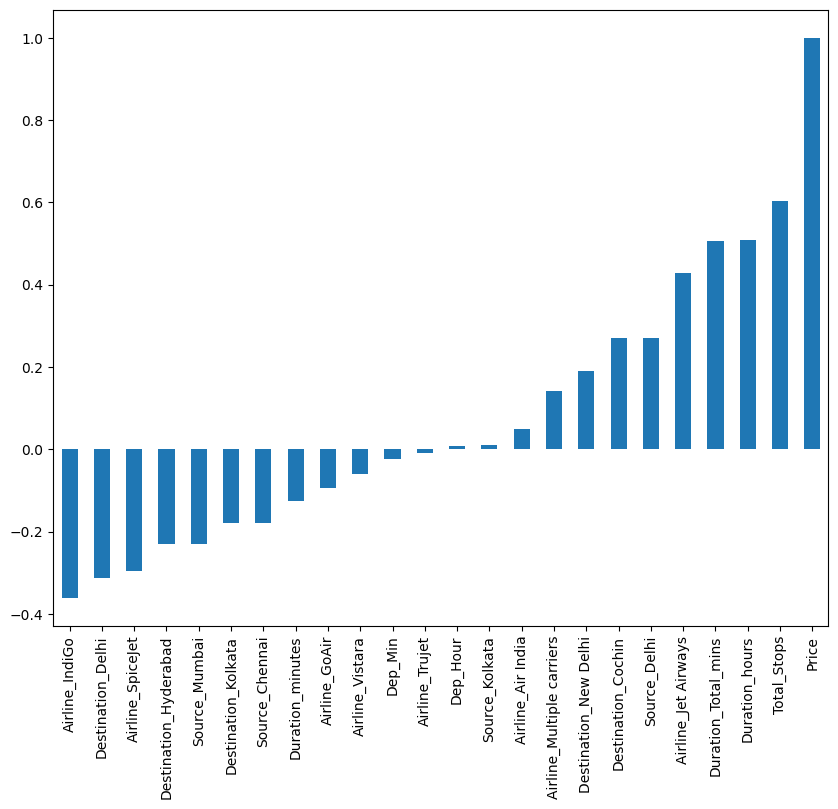

In [115]:
features.plot(kind='bar',figsize=(10,8))

From the graph above, we can deduct some of the highly correlated features and select only those ones for any future analysis.


## **Feature Extraction using Principal Component Analysis (Optional)**


### **PCA with Scikit-Learn**


## Principal Component Analysis (PCA)

Principal Component Analysis is a powerful technique for dimensionality reduction and feature extraction. It works by:

1. **Finding Patterns**: PCA identifies the main patterns (principal components) in the data
2. **Reducing Dimensions**: Projects data onto a lower-dimensional space while preserving important variations
3. **Preserving Information**: Maximizes the variance retained in the reduced dimensions

### Why Use PCA?
- **Dimensionality Reduction**: Helps combat the curse of dimensionality
- **Feature Extraction**: Creates new meaningful features from existing ones
- **Visualization**: Makes high-dimensional data visualizable in 2D or 3D
- **Noise Reduction**: Can help filter out noise in the data

### Implementation Steps:
1. Standardize the features (required for PCA)
2. Apply PCA transformation
3. Analyze explained variance ratio
4. Choose optimal number of components
5. Transform data to reduced dimensions

When selecting the number of components, we'll look at:
- Cumulative explained variance ratio
- Elbow method in scree plot
- Business requirements for dimensionality reduction

First, we must scale our data using the `StandardScaler()` function.
We will assign all the independent variables to x, and the dependent variable, 'price', to y.


In [20]:
# Import PCA
from sklearn.decomposition import PCA

# Select numeric features for PCA
numeric_features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 
                   'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 
                   'FUELCONSUMPTION_COMB_MPG']

# Extract features (X) and target (y)
X = data[numeric_features]
y = data['CO2EMISSIONS']

# Initialize and fit PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print explained variance ratio for each component
print("Explained variance ratio by component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.3f} ({ratio*100:.1f}%)")

print("\nCumulative explained variance ratio:")
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
for i, ratio in enumerate(cumulative_variance_ratio):
    print(f"First {i+1} components: {ratio:.3f} ({ratio*100:.1f}%)")

Explained variance ratio by component:
PC1: 0.946 (94.6%)
PC2: 0.033 (3.3%)
PC3: 0.017 (1.7%)
PC4: 0.003 (0.3%)
PC5: 0.001 (0.1%)
PC6: 0.000 (0.0%)

Cumulative explained variance ratio:
First 1 components: 0.946 (94.6%)
First 2 components: 0.979 (97.9%)
First 3 components: 0.996 (99.6%)
First 4 components: 0.999 (99.9%)
First 5 components: 1.000 (100.0%)
First 6 components: 1.000 (100.0%)


## Principal Component Analysis (PCA) Results

The PCA analysis reveals significant insights about the dimensionality of our numeric features:

1. **First Principal Component (PC1)**:
   - Explains 94.6% of the total variance
   - This indicates that most of the information in our numeric features can be captured by a single component
   - Suggests strong correlation between the features

2. **Second Principal Component (PC2)**:
   - Adds 3.3% more explained variance
   - Together with PC1, explains 97.9% of total variance

3. **Remaining Components**:
   - PC3 through PC6 contribute very little additional information
   - Only about 2.1% of variance is explained by these components

**Key Insights:**
- The high variance explained by PC1 suggests that our numeric features are highly correlated
- We could potentially reduce the dimensionality of our data to 2 or 3 components while retaining over 99% of the information
- This reduction could help simplify our model while maintaining its predictive power

Component Loadings:
                               PC1       PC2       PC3       PC4       PC5  \
ENGINESIZE               -0.123793  0.085366  0.521836  0.255196  0.799969   
CYLINDERS                -0.150014  0.101621  0.802453  0.031778 -0.567652   
FUELCONSUMPTION_CITY     -0.416574  0.449399 -0.030249 -0.641030  0.111917   
FUELCONSUMPTION_HWY      -0.274401  0.429786 -0.245848  0.720557 -0.157726   
FUELCONSUMPTION_COMB     -0.352604  0.440644 -0.127721 -0.026524 -0.010012   
FUELCONSUMPTION_COMB_MPG  0.767471  0.633675  0.078025 -0.055128  0.017833   

                               PC6  
ENGINESIZE                0.000198  
CYLINDERS                -0.000030  
FUELCONSUMPTION_CITY     -0.447377  
FUELCONSUMPTION_HWY      -0.368058  
FUELCONSUMPTION_COMB      0.815099  
FUELCONSUMPTION_COMB_MPG  0.000086  


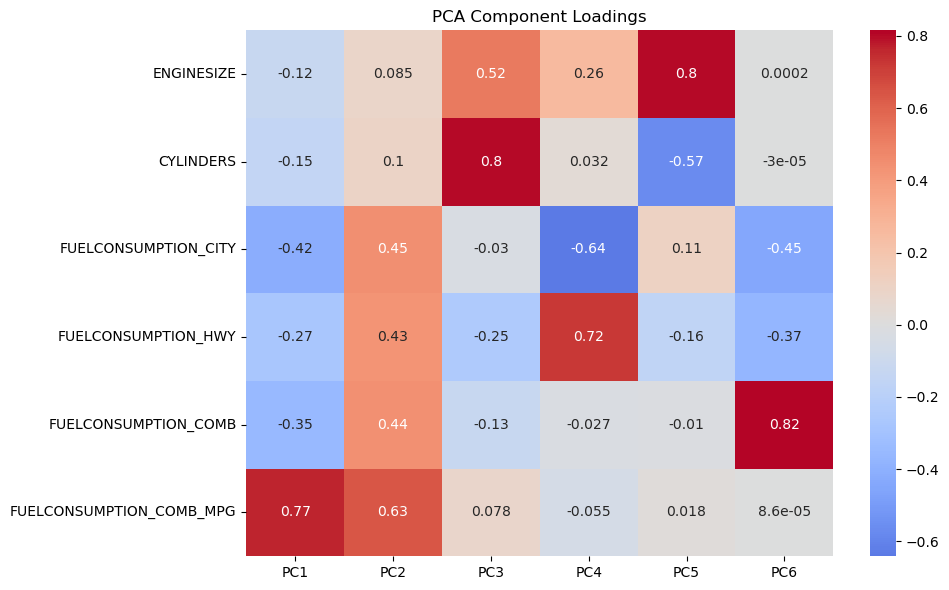

In [21]:
# Analyze component loadings
component_loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(pca.components_))],
    index=numeric_features
)

print("Component Loadings:")
print(component_loadings)

# Plot heatmap of component loadings
plt.figure(figsize=(10, 6))
sns.heatmap(component_loadings, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Component Loadings')
plt.tight_layout()
plt.show()

## Analysis of Principal Component Loadings

The component loadings reveal how each original feature contributes to the principal components:

1. **First Principal Component (PC1)**:
   - Strong positive loading from FUELCONSUMPTION_COMB_MPG (0.77)
   - Moderate negative loadings from fuel consumption metrics
   - Represents a contrast between fuel efficiency and consumption
   
2. **Second Principal Component (PC2)**:
   - Positive loadings from all fuel consumption metrics (~0.44)
   - Strong positive loading from MPG (0.63)
   - Captures overall fuel usage patterns
   
3. **Third Principal Component (PC3)**:
   - Strong loading from CYLINDERS (0.80)
   - Moderate loading from ENGINESIZE (0.52)
   - Represents engine characteristics

4. **Lower Order Components (PC4-PC6)**:
   - Contribute very little to overall variance
   - Capture residual patterns and noise in the data

This analysis suggests that we could effectively represent our data using just the first 2-3 principal components while retaining most of the important information.

## Summary and Conclusions

Our feature engineering and exploratory data analysis have revealed several key insights about the vehicle fuel consumption dataset:

### 1. Data Preprocessing
- Successfully handled categorical variables through one-hot encoding
- Standardized numerical features to ensure comparable scales
- No missing values or significant data quality issues found

### 2. Feature Relationships
- Strong correlations between engine characteristics and fuel consumption
- Very strong relationship between fuel consumption and CO2 emissions
- Inverse relationship between MPG and other consumption metrics

### 3. Distribution Patterns
- Bimodal distribution of engine sizes
- Discrete grouping of cylinder counts (4, 6, 8)
- Right-skewed distribution of fuel consumption and MPG
- Approximately normal distribution of CO2 emissions

### 4. Dimensionality Reduction
- PCA revealed high redundancy in numerical features
- First principal component explains 94.6% of variance
- Two components capture 97.9% of total variance
- Potential for significant dimensionality reduction

### 5. Recommendations for Modeling
1. Consider using reduced feature set (2-3 PCA components)
2. Be aware of the strong correlations when selecting modeling approaches
3. May need to handle the categorical vehicle classes carefully due to imbalance
4. Consider the non-linear relationships revealed in scatter plots

These insights will be valuable for selecting and implementing appropriate machine learning models in subsequent analysis.

In [118]:
y= data1.Price

In [119]:
scaler = StandardScaler()
x=scaler.fit_transform(x.astype(np.float64))
x

array([[-1.22052384, -0.44291155, -0.13599841, ..., -0.93158255,
         1.65425948, -0.23505036],
       [ 1.74150619,  2.25778713, -0.13599841, ..., -0.39007152,
        -1.30309491,  1.36349161],
       [ 1.74150619, -0.44291155, -0.13599841, ...,  0.97847452,
        -0.60724682,  0.0313733 ],
       ...,
       [-1.22052384, -0.44291155, -0.13599841, ..., -0.91189124,
        -0.78120884, -0.23505036],
       [-1.22052384, -0.44291155, -0.13599841, ..., -0.95127386,
        -0.25932278,  0.29779696],
       [ 1.74150619,  2.25778713, -0.13599841, ..., -0.28176932,
        -0.4332848 ,  1.62991527]])

Once the data is scaled, we can apply the `fit_transform()` function to reduce the dimensionality of the dataset down to two dimensions.


In [124]:
pca = PCA(n_components = 2)
pca.fit_transform(x)

array([[-2.3201143 ,  0.32122138],
       [ 0.26789849,  1.4952152 ],
       [ 2.96796896, -0.27012269],
       ...,
       [-1.70270646,  0.19516   ],
       [-2.09463756,  0.73948289],
       [ 1.79797227, -0.92884514]])

### **Explained Variance Ratio**


Another useful piece of information in PCA is the explained variance ratio of each principal component, available via the `explained_variance_ratio_` function. The ratio indicates the proportion of the dataset's variance that lies along each principal component. Let's look at the explained variance ratio of each of our two components.


In [125]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.18896819, 0.10847679])

The first component constitutes 17.54% of the variance and second component constitutes 12.11% of the variance between the features.


## Exercise 6 (Optional)

In this exercise, experiment with the number of components to see how many dimensions our dataset could be reduced to in order to explain most of the variability between the features. Additionally, you can plot the components using bar plot to see how much variability each component represents.


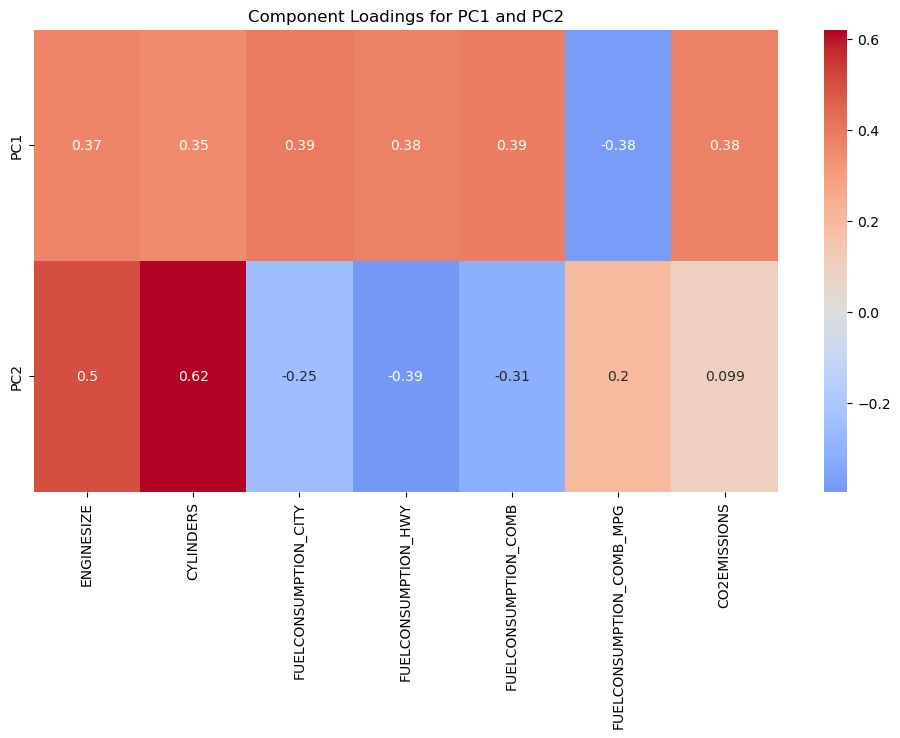


PC1 strongest correlations:
FUELCONSUMPTION_CITY    0.391457
FUELCONSUMPTION_COMB    0.389972
CO2EMISSIONS            0.382204
FUELCONSUMPTION_HWY     0.378723
ENGINESIZE              0.366956
Name: PC1, dtype: float64

PC2 strongest correlations:
CYLINDERS                   0.620562
ENGINESIZE                  0.503322
FUELCONSUMPTION_COMB_MPG    0.199135
CO2EMISSIONS                0.098953
FUELCONSUMPTION_CITY       -0.251457
Name: PC2, dtype: float64


In [31]:
# Get feature names
feature_names = numeric_cols

# Create a DataFrame of the component loadings
component_loadings = pd.DataFrame(
    pca.components_,
    columns=feature_names,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

# Plot heatmap of component loadings
plt.figure(figsize=(12, 6))
sns.heatmap(component_loadings.iloc[:2], annot=True, cmap='coolwarm', center=0)
plt.title('Component Loadings for PC1 and PC2')
plt.show()

# Print the loadings for PC1 and PC2
print("\nPC1 strongest correlations:")
pc1_loadings = pd.Series(component_loadings.iloc[0], index=feature_names)
print(pc1_loadings.sort_values(ascending=False)[:5])
print("\nPC2 strongest correlations:")
pc2_loadings = pd.Series(component_loadings.iloc[1], index=feature_names)
print(pc2_loadings.sort_values(ascending=False)[:5])

<details>
<summary><strong>Solution_part1</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

pca = PCA(n_components = 7)
pca.fit_transform(x)
explained_variance=pca.explained_variance_ratio\_
explained_variance

</code>
</details>


<details>
<summary><strong>Solution_part2</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

with plt.style.context('dark_background'):
plt.figure(figsize=(6, 4))

```
plt.bar(range(7), explained_variance, alpha=0.5, align='center',
    label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout() 
```

</code>
</details>


### **Choosing the Right Number of Dimensions**

Instead of arbitrary choosing the number of dimensions to reduce down to, it is simpler to choose the number of dimensions that add up to a sufficiently large proportion of the variance, let's say 95%.

The following code performs PCA without reducing dimensionality, then computes the minimum number of dimensions required to preserve 95% of the variance.


In [28]:
X = data[numeric_cols]
# Chuẩn hóa dữ liệu trước khi PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >=0.95) + 1
print(f"Number of components needed to explain 95% of variance: {d}")

Number of components needed to explain 95% of variance: 2


In [29]:
d

np.int64(2)

There are 16 components required to meet 95% variance. Therefore, we could set n_components = 16 and run PCA again. However, there is better way, instead of specifying the number of principal components you want to preserve, you can set n_components to be a float between 0.0 and 1.0, indicating the ratio of variance you wish to preserve.


In [145]:
pca = PCA(n_components=0.95)
x_reduced = pca.fit_transform(x)

There is also a graphical way to determine the number of principal components in your analysis. It is to plot the explained variance as a function of the number of dimensions. There will usually be an elbow in the curve, where the explained variance stops growing fast. That point is usually the optimal point for the number of principal components.


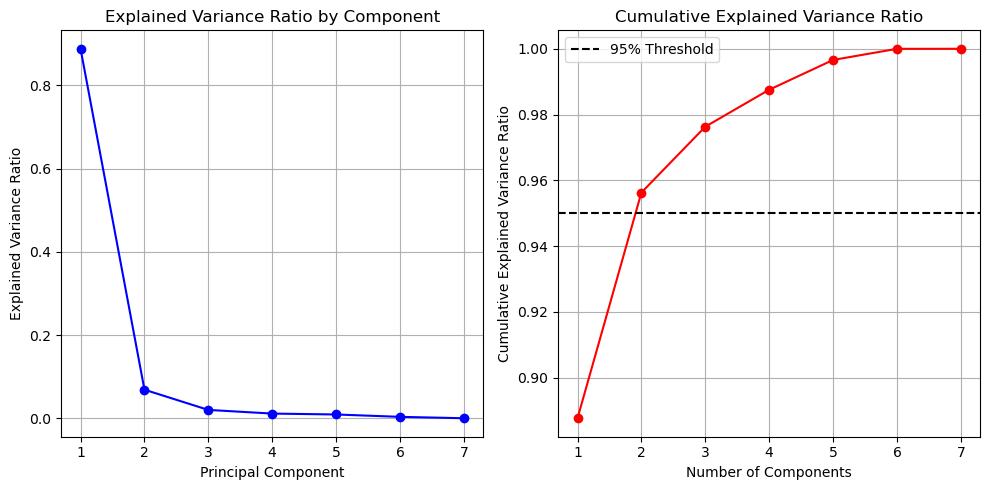


Explained variance ratio for each component:
PC1: 0.8877 (88.77%)
PC2: 0.0686 (6.86%)
PC3: 0.0200 (2.00%)
PC4: 0.0112 (1.12%)
PC5: 0.0091 (0.91%)
PC6: 0.0034 (0.34%)
PC7: 0.0000 (0.00%)


In [30]:
plt.figure(figsize=(10, 5))

# Plot explained variance ratio
plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'bo-')
plt.title('Explained Variance Ratio by Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)

# Plot cumulative explained variance ratio
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumsum) + 1), cumsum, 'ro-')
plt.axhline(y=0.95, color='k', linestyle='--', label='95% Threshold')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# In ra phương sai giải thích được bởi các thành phần
print("\nExplained variance ratio for each component:")
for i, ratio in enumerate(pca.explained_variance_ratio_, 1):
    print(f"PC{i}: {ratio:.4f} ({ratio*100:.2f}%)")

# Congratulations! - You have completed the lab


## Author


[Svitlana Kramar](https://www.linkedin.com/in/svitlana-kramar/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2022-01-17        | 0.1     | Svitlana   | Modified multiple areas |


Copyright © 2020 IBM Corporation. All rights reserved.
